In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp, feature_selection as fs, model_selection as ms
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC,SVR
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.ensemble import BaggingClassifier,BaggingRegressor,RandomForestClassifier,RandomForestRegressor,\
ExtraTreesClassifier,ExtraTreesRegressor,AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier,\
GradientBoostingRegressor,VotingClassifier,VotingRegressor
from sklearn import metrics as mt

In [20]:
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [22]:
df = pd.read_table('Datasets/housing.data',delim_whitespace=True,names=names)

In [23]:
df.shape

(506, 14)

In [24]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [45]:
df.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [25]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [26]:
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


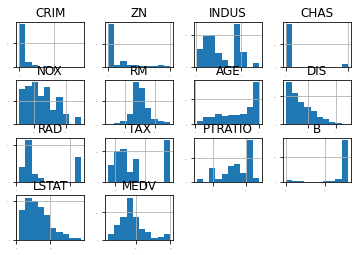

In [28]:
df.hist(sharex=False,sharey=False,xlabelsize=1,ylabelsize=1)
plt.show()

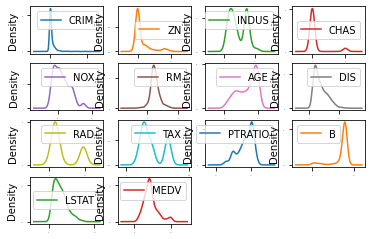

In [31]:
df.plot(kind='density',subplots=True,layout=(4,4),sharex=False,fontsize=1)
plt.show()

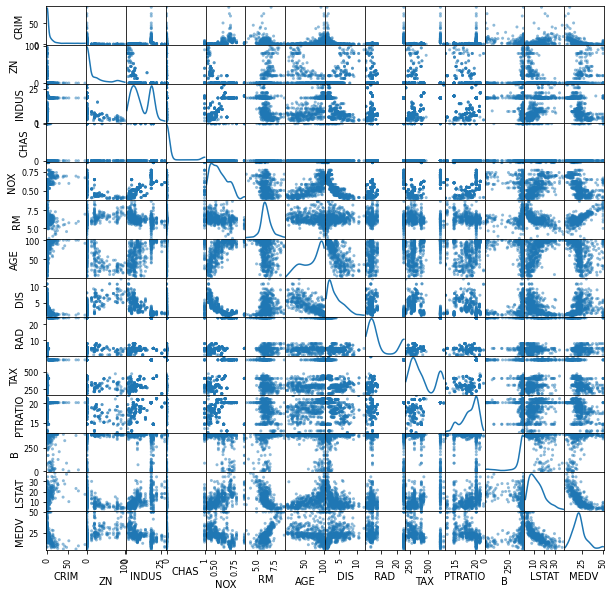

In [36]:
pd.plotting.scatter_matrix(df,diagonal='density',figsize=(10,10))
plt.show()

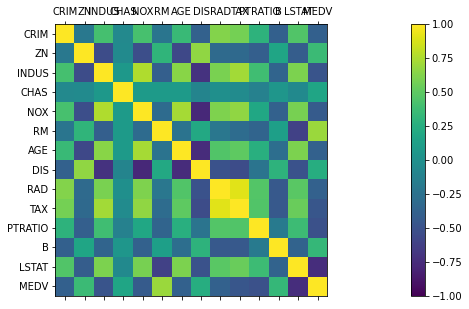

In [44]:
fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(111)

cax = ax.matshow(df.corr(),vmin=-1,vmax=1)

fig.colorbar(cax)

ticks = np.arange(0,14)

ax.set_xticks(ticks)

ax.set_yticks(ticks)

ax.set_xticklabels(names,)

ax.set_yticklabels(names)

plt.show()

In [46]:
array = df.values

x = array[:,0:13]

y = array[:,13]

In [47]:
xtrain,xvalidation,ytrain,yvalidation = ms.train_test_split(x,y,test_size=0.2,random_state=7)

In [48]:
models = []
models.append(('LinR',LinearRegression()))
models.append(('Lasso',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('DT',DecisionTreeRegressor()))
models.append(('SVM',SVR()))

In [49]:
scoring = 'neg_mean_squared_error'

In [50]:
results = []
names = []
for name,model in models:
    kfold = ms.KFold(n_splits=10)
    cv_result = ms.cross_val_score(model,xtrain,ytrain,cv=kfold,scoring=scoring)
    results.append(cv_result)
    names.append(name)
    print('%s: %f (%f)'%(name,cv_result.mean(),cv_result.std()))

LinR: -21.379856 (9.414264)
Lasso: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
DT: -26.598611 (12.236145)
SVM: -67.827910 (29.049156)


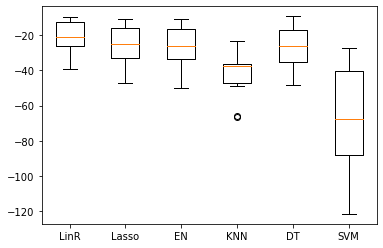

In [51]:
fig = plt.figure()

ax = fig.add_subplot(111)

ax.boxplot(results)

ax.set_xticklabels(names)

plt.show()

In [52]:
pipeline = []
pipeline.append(('scaledLinR',Pipeline([('Scaler',pp.StandardScaler()),('LinR',LinearRegression())])))
pipeline.append(('scaledLasso',Pipeline([('Scaler',pp.StandardScaler()),('Lasso',Lasso())])))
pipeline.append(('scaledEN',Pipeline([('Scaler',pp.StandardScaler()),('EN',ElasticNet())])))
pipeline.append(('scaledKNN',Pipeline([('Scaler',pp.StandardScaler()),('KNN',KNeighborsRegressor())])))
pipeline.append(('scaledDT',Pipeline([('Scaler',pp.StandardScaler()),('DT',DecisionTreeRegressor())])))
pipeline.append(('scaledSVM',Pipeline([('Scaler',pp.StandardScaler()),('SVM',SVR())])))

In [54]:
results = []
names = []
for name,model in pipeline:
    kfold = ms.KFold(n_splits=10)
    cv_result = ms.cross_val_score(model,xtrain,ytrain,cv=kfold,scoring=scoring)
    results.append(cv_result)
    names.append(name)
    print('%s: %f (%f)'%(name,cv_result.mean(),cv_result.std()))

scaledLinR: -21.379856 (9.414264)
scaledLasso: -26.607314 (8.978761)
scaledEN: -27.932372 (10.587490)
scaledKNN: -20.107620 (12.376949)
scaledDT: -26.895864 (12.483807)
scaledSVM: -29.633086 (17.009186)


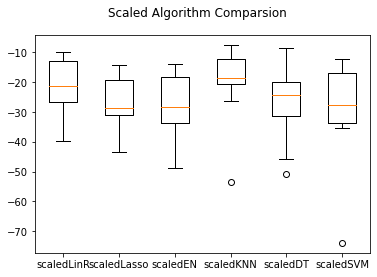

In [55]:
fig = plt.figure()

fig.suptitle('Scaled Algorithm Comparsion')

ax = fig.add_subplot(111)

ax.boxplot(results)

ax.set_xticklabels(names)

plt.show()

In [56]:
scaler = pp.StandardScaler().fit(xtrain)
scaledx = scaler.transform(xtrain)

In [57]:
k_vals = [x for x in range(1,22,2)]

In [59]:
params = dict(n_neighbors=k_vals)

In [60]:
model = KNeighborsRegressor()

In [61]:
grid = ms.GridSearchCV(model,param_grid=params,cv=kfold,scoring=scoring)

In [62]:
grid.fit(scaledx,ytrain)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,
                                         21]},
             scoring='neg_mean_squared_error')

In [63]:
'best: %f using %s' % (grid.best_score_,grid.best_estimator_)

'best: -18.109304 using KNeighborsRegressor(n_neighbors=3)'

In [69]:
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']

In [70]:
for mean,std,param in zip(means,stds,params):
    print('%f (%f) with: %r' % (mean,std,param))

-20.169640 (14.986904) with: {'n_neighbors': 1}
-18.109304 (12.880861) with: {'n_neighbors': 3}
-20.063115 (12.138331) with: {'n_neighbors': 5}
-20.514297 (12.278136) with: {'n_neighbors': 7}
-20.319536 (11.554509) with: {'n_neighbors': 9}
-20.963145 (11.540907) with: {'n_neighbors': 11}
-21.099040 (11.870962) with: {'n_neighbors': 13}
-21.506843 (11.468311) with: {'n_neighbors': 15}
-22.739137 (11.499596) with: {'n_neighbors': 17}
-23.829011 (11.277558) with: {'n_neighbors': 19}
-24.320892 (11.849667) with: {'n_neighbors': 21}


In [71]:
ensembles = []
ensembles.append(('ScaledAB',Pipeline([('Scaler',pp.StandardScaler()),('AB',AdaBoostRegressor())])))
ensembles.append(('ScaledG',Pipeline([('Scaler',pp.StandardScaler()),('Gradient',GradientBoostingRegressor())])))
ensembles.append(('ScaledRF',Pipeline([('Scaler',pp.StandardScaler()),('RF',RandomForestRegressor())])))
ensembles.append(('ScaledET',Pipeline([('Scaler',pp.StandardScaler()),('ET',ExtraTreesRegressor())])))

In [72]:
results = []
names = []
for name,model in ensembles:
    kfold = ms.KFold(n_splits=10)
    cv_result = ms.cross_val_score(model,xtrain,ytrain,cv=kfold,scoring=scoring)
    results.append(cv_result)
    names.append(name)
    print('%s: %f (%f)'%(name,cv_result.mean(),cv_result.std()))

ScaledAB: -14.892618 (6.177626)
ScaledG: -10.073489 (4.457656)
ScaledRF: -12.182615 (6.431250)
ScaledET: -9.399688 (5.718764)


In [82]:
scaler = pp.StandardScaler().fit(xtrain)
rescaledx = scaler.transform(xtrain)

model = ExtraTreesRegressor(random_state=7)

n_ests = np.arange(50,450,50)

params = dict(n_estimators=n_ests)

grid = ms.GridSearchCV(model,param_grid=params,cv=kfold,scoring=scoring)

In [84]:
grid.fit(rescaledx,ytrain)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=ExtraTreesRegressor(random_state=7),
             param_grid={'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400])},
             scoring='neg_mean_squared_error')

In [91]:
'best: %f using %s'%(grid.best_score_,grid.best_params_)

means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']

for mean,std,param in zip(means,stds,params):
    print('%f (%f) with: %r' % (mean,std,param))

"best: -9.024715 using {'n_estimators': 350}"

# our finalized model in ExtraTrees which perform best

In [1]:
scaler = pp.StandardScaler().fit(xtrain)
rescaledx = scaler.transform(xtrain)

NameError: name 'pp' is not defined

In [106]:
model = ExtraTreesRegressor(n_estimators=grid.best_params_['n_estimators'],random_state=7)

In [107]:
model.fit(rescaledx,ytrain)

ExtraTreesRegressor(n_estimators=350, random_state=7)

In [108]:
rescaledxval = scaler.transform(xvalidation)

In [109]:
yprediction = model.predict(rescaledxval)

In [110]:
print(mt.mean_squared_error(yvalidation,yprediction))

13.25004979911968
